# Linear Regression

### 학생의 공부시간과 획득 점수를 예측해본다

x = 공부시간
y = 0 ~ 100점 사이 

regression

|x(hours)| y(score)|
|--------|---------|
|10|90|
|9|80|
|3|50|
|2|30|

위의 데이터를 가지고, 모델을 만들고 학습을 하고, \
새로운데이터(7시간 공부한 학생)의 스코어(점수)를 예측한다.

|x|y|
|-|-|
|1|1|
|2|2|
|3|3|

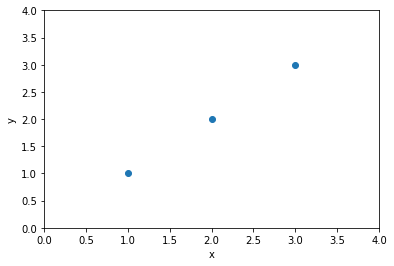

In [5]:
from matplotlib import pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]

plt.plot(x, y, 'o')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Linear Hypothesis

H(x) = Wx + b
일차방정식으로 가설을 세운다.

위의 경우 H(x) = 1 * 1 + 0 으로 나옴

일차방정식과 실제데이터간의 거리가 가까울수록 W와 B값이 좋은 값이다.
우리가 세운 가설과 실제데이터가 얼마나 다른지 확인 - cost function 혹은 loss function

제곱을 많이 해준다. 차이를 모두 양수로 변환할 수 있어 장점

코스트 펑션 : 각 좌표의 값을 코스트 펑션에 넣어 각 좌표의 갯수로 나누어 평균을 내준다.


W와 b를 최소화하는! minimized cost

## Hypothesis

주어진 x의 값을 어떻게 예측할 것인가? => Hypothesis \
weight과 곱한값에 bios를 합한값이다.

## Cost function

Hypothesis로 예측한 값이 실제의 값과 얼마나 차이가 있는가? \
W와 b값을 달리하여 cost값을 가장 작게 만드는것 => 학습한다


In [6]:
import tensorflow as tf

# 데이터 셋팅
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Variable - tensorflow가 사용하는 변수
w = tf.Variable(tf.random_normal([1]), name='weight')    # [1] : shape 1
b = tf.Variable(tf.random_normal([1]), name='bias')

# hypothesis 셋팅
hypothesis = x_train * w + b

# cost/loss function 셋팅
cost = tf.reduce_mean(tf.square(hypothesis - y_train))    # reduce_mean : 평균

# cost를 minimize 하는 방법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)    # 무엇을 minimize 할것인가?

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))
        
# 회차가 거듭될 수록 cost는 낮아짐, weight 은 1에 가까워짐, bias는 0에 가까워짐

0 2.2495892 [0.11271621] [0.46127373]
20 0.08606521 [0.64627457] [0.6559654]
40 0.06042178 [0.7097329] [0.64574]
60 0.054715153 [0.7278339] [0.61735433]
80 0.049691718 [0.7410493] [0.58852774]
100 0.04513082 [0.7532596] [0.56088686]
120 0.040988494 [0.76485926] [0.5345289]
140 0.037226427 [0.7759104] [0.50940824]
160 0.033809636 [0.7864418] [0.48546797]
180 0.030706456 [0.79647833] [0.4626527]
200 0.02788809 [0.80604297] [0.44090974]
220 0.02532841 [0.8151583] [0.42018864]
240 0.023003662 [0.8238452] [0.40044132]
260 0.020892313 [0.8321238] [0.3816221]
280 0.018974738 [0.8400134] [0.36368725]
300 0.017233165 [0.8475322] [0.3465953]
320 0.01565143 [0.8546975] [0.33030662]
340 0.0142148705 [0.8615262] [0.31478345]
360 0.012910171 [0.868034] [0.29998985]
380 0.011725233 [0.87423587] [0.28589144]
400 0.010649044 [0.8801463] [0.2724556]
420 0.009671628 [0.88577896] [0.25965118]
440 0.008783936 [0.89114696] [0.2474485]
460 0.007977711 [0.89626265] [0.23581934]
480 0.0072454778 [0.90113795] [

In [12]:
import tensorflow as tf

# Variable - tensorflow가 사용하는 변수
w = tf.Variable(tf.random_normal([1]), name='weight')    # [1] : shape 1
b = tf.Variable(tf.random_normal([1]), name='bias')
# 데이터 셋팅
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# hypothesis 셋팅
hypothesis = x * w + b

# cost/loss function 셋팅
cost = tf.reduce_mean(tf.square(hypothesis - y))    # reduce_mean : 평균

# cost를 minimize 하는 방법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)    # 무엇을 minimize 할것인가?

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w, b, train],
                                        feed_dict={x: [1, 2, 3, 4, 5],
                                                   y: [2.1, 3.1, 4.1, 5.1 ,6.1]})
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)

0 10.712462 [0.28962117] [0.11614249]
20 0.085159585 [1.1850946] [0.41572163]
40 0.07418133 [1.176807] [0.46159765]
60 0.06478308 [1.1652452] [0.503412]
80 0.056575637 [1.1544232] [0.5424829]
100 0.049407892 [1.1443099] [0.5789953]
120 0.043148287 [1.1348588] [0.6131163]
140 0.03768169 [1.1260269] [0.64500284]
160 0.032907687 [1.1177733] [0.67480093]
180 0.028738534 [1.1100602] [0.70264757]
200 0.025097603 [1.1028522] [0.7286705]
220 0.02191792 [1.0961164] [0.7529891]
240 0.019141082 [1.0898217] [0.7757152]
260 0.016716016 [1.0839392] [0.7969529]
280 0.014598246 [1.078442] [0.81679964]
300 0.012748731 [1.0733048] [0.83534676]
320 0.011133572 [1.068504] [0.85267895]
340 0.009723041 [1.0640175] [0.8688763]
360 0.008491198 [1.0598251] [0.8840127]
380 0.0074154497 [1.055907] [0.8981579]
400 0.006475956 [1.0522456] [0.9113766]
420 0.005655496 [1.048824] [0.9237297]
440 0.004938989 [1.0456265] [0.93527377]
460 0.004313253 [1.0426384] [0.94606185]
480 0.003766813 [1.039846] [0.9561432]
500 0.

In [13]:
# 트레이닝 결과 확인
print(sess.run(hypothesis, feed_dict={x: [5]}))
print(sess.run(hypothesis, feed_dict={x: [2.5]}))
print(sess.run(hypothesis, feed_dict={x: [1.5, 3.5]}))

[6.1003213]
[3.5997434]
[2.599512  4.5999746]
